# SVM - Social Network Ads

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('SocialNetworkAds.csv')

In [5]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


#### Modelo

In [8]:
# Modelo con Age y Estimated Salary
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

#### Escalamiento

In [11]:
from sklearn.preprocessing import StandardScaler

In [13]:
# utilizaremos el escalador estandar (estandarización)
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [15]:
X_sc = scaler.transform(X)

In [17]:
X_sc[:5]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

#### Cross-Validation

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=41)

### 1. Clasificador SVM con kernel Lineal

In [25]:
from sklearn.svm import SVC

In [27]:
classifier_linear = SVC(kernel='linear', random_state=41)
classifier_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=41)

#### Métricas de Evaluación

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [32]:
y_pred_train_linear = classifier_linear.predict(X_train)
y_pred_test_linear = classifier_linear.predict(X_test)


In [34]:
# Evaluación del modelo
print("Linear SVM - Training Set Metrics")
print("Accuracy:", accuracy_score(y_train, y_pred_train_linear))
print("Precision:", precision_score(y_train, y_pred_train_linear))
print("Recall:", recall_score(y_train, y_pred_train_linear))
print("F1 Score:", f1_score(y_train, y_pred_train_linear))

Linear SVM - Training Set Metrics
Accuracy: 0.8433333333333334
Precision: 0.8470588235294118
Recall: 0.6792452830188679
F1 Score: 0.7539267015706806


#### Visualización Training Set

In [38]:
from matplotlib.colors import ListedColormap

#
# Funcion muy util para graficar los limites de decision
#
def grafica_decision_boudary(X_set, y_set, classifier, title):
    # Visualising the set results
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

/var/folders/z7/s8_bm31j1vqbws7fljh6p4xw0000gn/T/ipykernel_22527/401707372.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


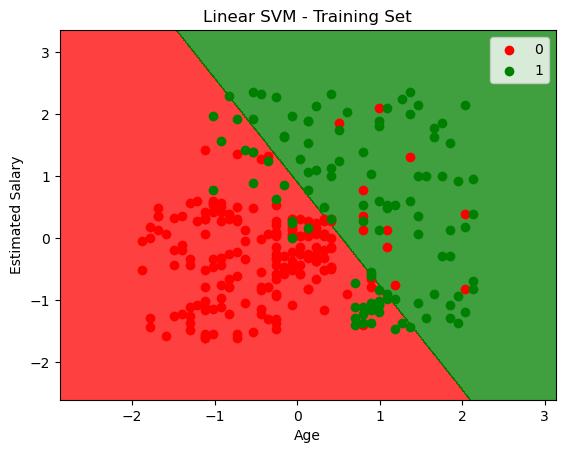

In [40]:
grafica_decision_boudary(X_train, y_train, classifier_linear, "Linear SVM - Training Set")

#### Visualización Test Set

/var/folders/z7/s8_bm31j1vqbws7fljh6p4xw0000gn/T/ipykernel_22527/401707372.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


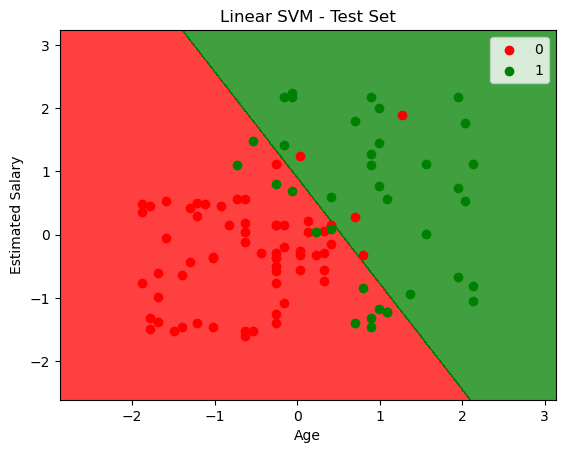

In [43]:
grafica_decision_boudary(X_test, y_test, classifier_linear, "Linear SVM - Test Set")

### 2. Clasificador SVM con kernel RBF

In [46]:
# SVM with RBF Kernel
classifier_rbf = SVC(kernel='rbf', random_state=41)
classifier_rbf.fit(X_train, y_train)

SVC(random_state=41)

#### Métricas de Evaluación

In [49]:
y_pred_train_rbf = classifier_rbf.predict(X_train)
y_pred_test_rbf = classifier_rbf.predict(X_test)

In [51]:
# Evaluate the model
print("\nRBF SVM - Training Set Metrics")
print("Accuracy:", accuracy_score(y_train, y_pred_train_rbf))
print("Precision:", precision_score(y_train, y_pred_train_rbf))
print("Recall:", recall_score(y_train, y_pred_train_rbf))
print("F1 Score:", f1_score(y_train, y_pred_train_rbf))


RBF SVM - Training Set Metrics
Accuracy: 0.9066666666666666
Precision: 0.8305084745762712
Recall: 0.9245283018867925
F1 Score: 0.875


In [53]:
#Linear SVM - Training Set Metrics
#Accuracy: 0.8433333333333334
#Precision: 0.8470588235294118
#Recall: 0.6792452830188679
#F1 Score: 0.7539267015706806

#### Visualización Training Set

/var/folders/z7/s8_bm31j1vqbws7fljh6p4xw0000gn/T/ipykernel_22527/401707372.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


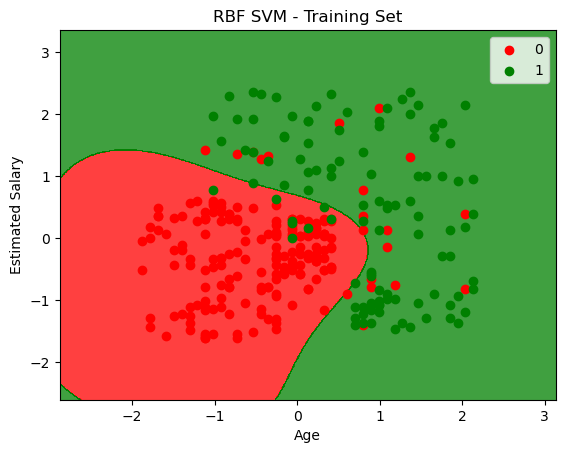

In [56]:
grafica_decision_boudary(X_train, y_train, classifier_rbf, "RBF SVM - Training Set")

#### Visualización Test Set

/var/folders/z7/s8_bm31j1vqbws7fljh6p4xw0000gn/T/ipykernel_22527/401707372.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


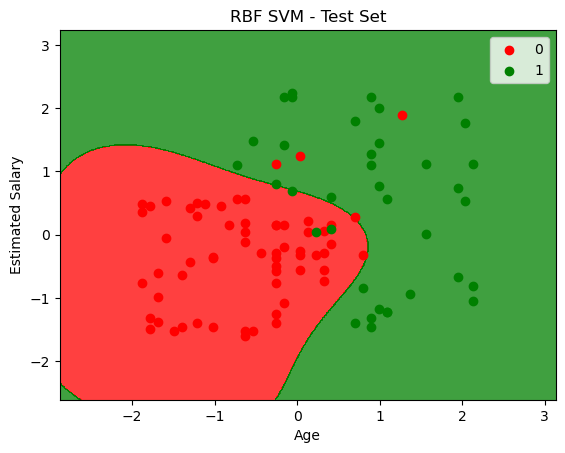

In [59]:
grafica_decision_boudary(X_test, y_test, classifier_rbf, "RBF SVM - Test Set")

In [61]:
from sklearn.model_selection import GridSearchCV

In [63]:
# Grilla

param_grid = {
    'C': [0.1, 1, 2, 5, 10, 30, 100],  # Regularization parameter
    'gamma': [1, 0.3, 0.5, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf']  # You can choose a specific kernel
}

In [65]:
svc = SVC()

In [67]:
# Setup GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 2, 5, 10, 30, 100],
                         'gamma': [1, 0.3, 0.5, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [69]:
# Print the best parameters and best score
print("Best Parameters found: ", grid_search.best_params_)
print("Best Cross-validation accuracy: {:.3f}".format(grid_search.best_score_))

Best Parameters found:  {'C': 2, 'gamma': 0.5, 'kernel': 'rbf'}
Best Cross-validation accuracy: 0.903


In [71]:
best_params = grid_search.best_params_

# Initialize the model with the best parameters
best_model = SVC(kernel=best_params['kernel'], 
                 C=best_params['C'], 
                 gamma=best_params['gamma'], 
                 random_state=41)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Now your model is trained and ready for further evaluation or predictions
print("Model trained with best parameters:", best_params)

# To evaluate on the test set
y_pred_test = best_model.predict(X_test)

# Calculate and print accuracy and other metrics
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with best parameters: {:.2f}".format(test_accuracy))

Model trained with best parameters: {'C': 2, 'gamma': 0.5, 'kernel': 'rbf'}
Test Accuracy with best parameters: 0.94


/var/folders/z7/s8_bm31j1vqbws7fljh6p4xw0000gn/T/ipykernel_22527/401707372.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


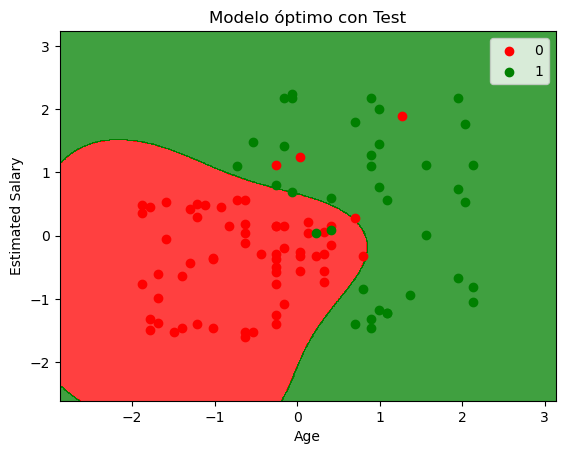

In [73]:
grafica_decision_boudary(X_test, y_test, best_model, "Modelo óptimo con Test")